In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import glob
import os
import pickle
import random
import sys

# import ivac
import matplotlib as mpl
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
import scipy
import seaborn as sns
from matplotlib import ticker
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import NearestNeighbors

import extq
import prettypyplot as pplt

In [3]:
! source /project/dinner/scguo/upside2/sourceme.sh

In [4]:
# upside_path = os.environ["UPSIDE_HOME"]
upside_path = "/project/dinner/scguo/upside2/"
upside_utils_dir = os.path.expanduser(upside_path + "/py")
sys.path.insert(0, upside_utils_dir)

In [5]:
# plt.style.use("custom")  # custom style sheet
plt.style.use("vibrant")  # muted color theme from SciencePlots
pplt.load_cmaps()

In [12]:
plt.rcParams[
    "text.latex.preamble"
] = r"\usepackage{siunitx}\sisetup{detect-all}\usepackage{helvet}\usepackage{sansmath}\sansmath"
mpl.rcParams["font.family"] = "sans-serif"
# mpl.rcParams["font.sans-serif"] = "cm"
mpl.rcParams["mathtext.fontset"] = "dejavusans"

In [7]:
lag = 5000
names = ["blue", "green", "orange", "r_rmsd", "qp"]
labels = dict(
    blue=r"$\alpha3_{\mathrm{fs}}\longleftrightarrow \beta4_{\mathrm{gs}}$",
    green=r"$\beta4_{\mathrm{fs}}\longleftrightarrow\alpha3_{\mathrm{gs}}$",
    orange=r"$\beta3_{\mathrm{fs}}\longleftrightarrow\alpha2_{\mathrm{gs}}$",
    r_rmsd="core RMSD (nm)",
    qp=r"$q_{\mathrm{fs}\rightarrow\mathrm{gs}}$",
)
lims = dict(blue=(-1, 1.3), green=(-1.3, 1), orange=(-1.3, 1), r_rmsd=(0, 1.5), qp=(0, 1))

In [8]:
cv1, cv2 = "green", "blue"
temps = [87, 89, 91]
hists_all = []
for t in temps:
    base_dir = f"/project/dinner/scguo/kaiB/dga/{t}"
    zkde = np.load(f"{base_dir}/dga_data/current_kde_{cv1}_{cv2}.npy")
    hists_all.append(zkde)

In [9]:
nx, ny, nz = 50, 50, 10
xmin, xmax = lims[cv1]
ymin, ymax = lims[cv2]
zmin, zmax = lims["qp"]
xlim_flux = np.linspace(xmin, xmax, nx + 1)
ylim_flux = np.linspace(ymin, ymax, ny + 1)
zlim_flux = np.linspace(zmin, zmax, nz + 1)
centerx_flux = (xlim_flux[1:] + xlim_flux[:-1]) / 2
centery_flux = (ylim_flux[1:] + ylim_flux[:-1]) / 2
centerz_flux = (zlim_flux[1:] + zlim_flux[:-1]) / 2

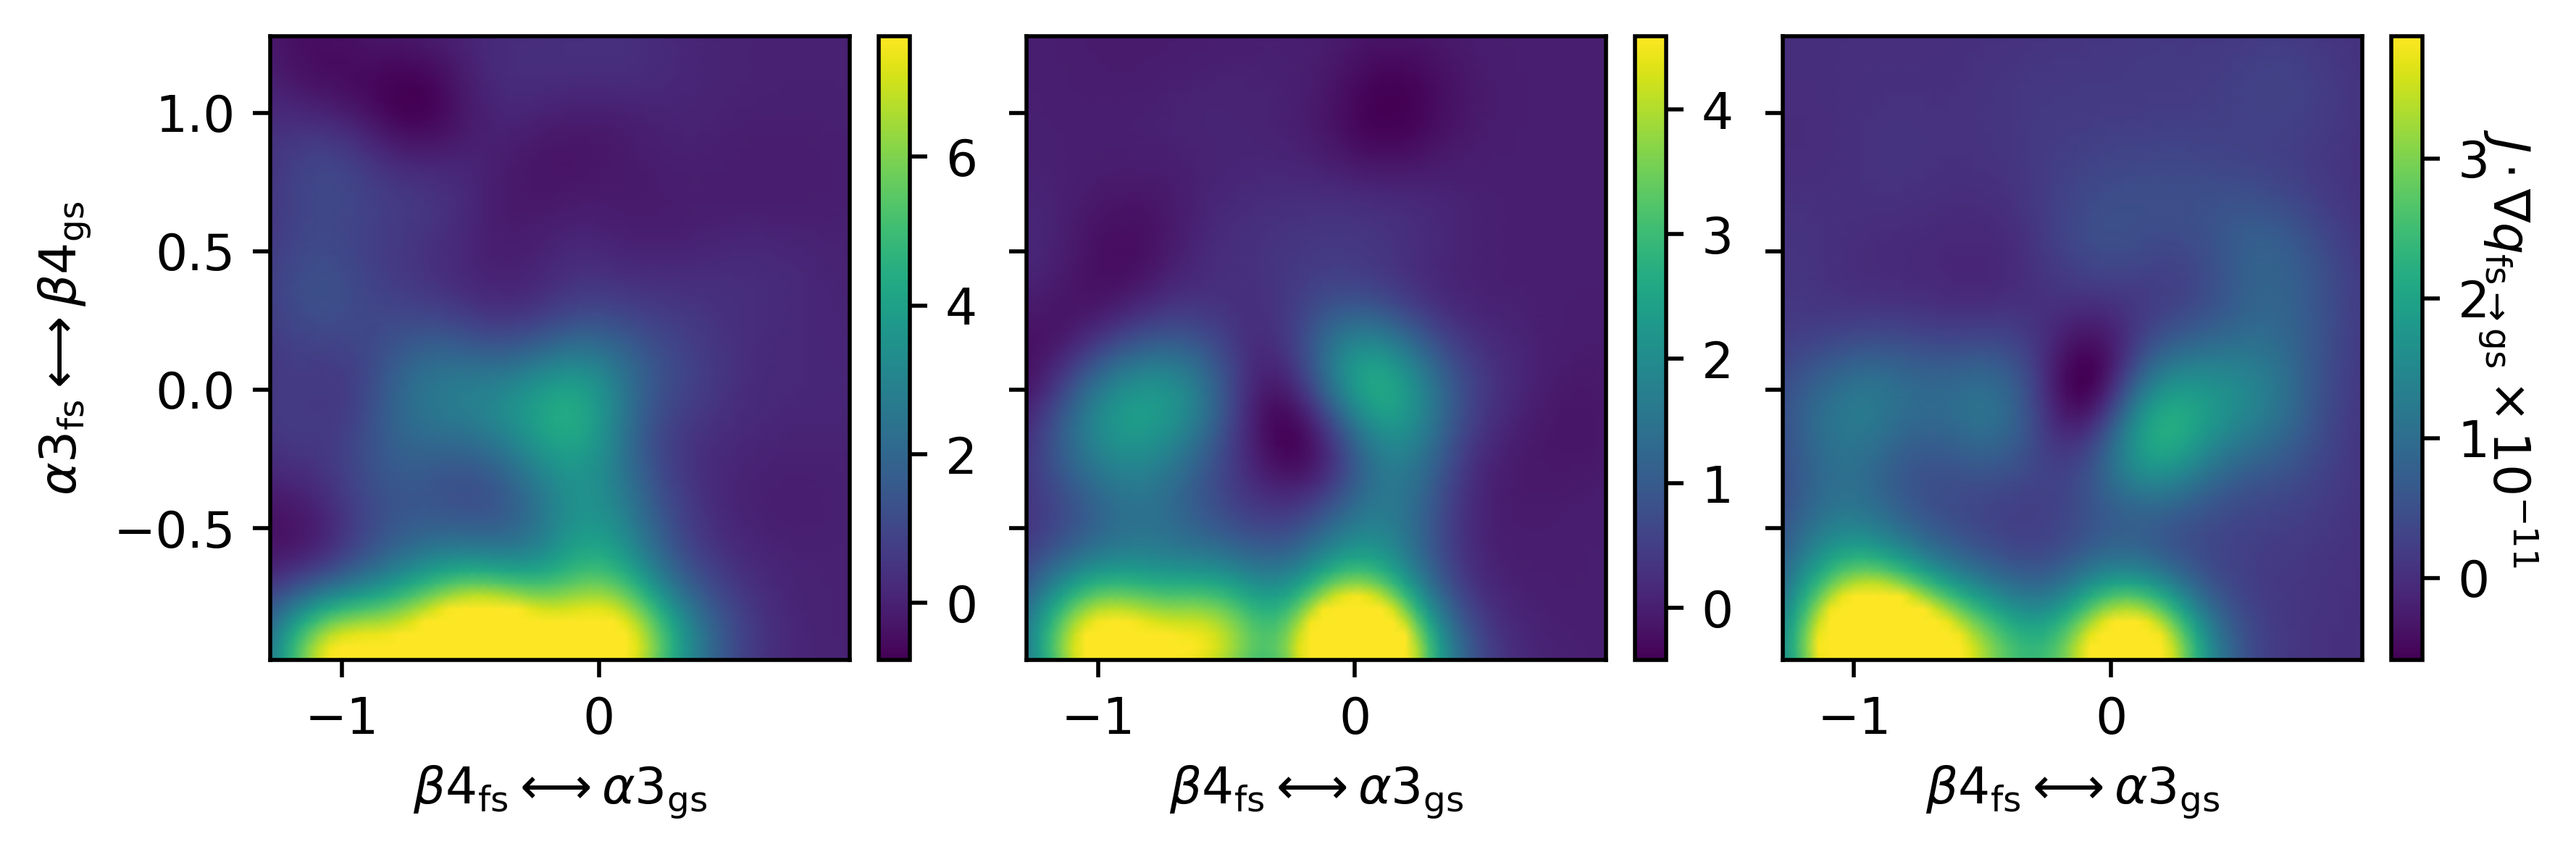

In [14]:
index = 4

fig, axes = plt.subplots(1, 3, figsize=(7, 2.25), sharex=True, sharey=True, constrained_layout=True, dpi=500)
for (zkde, ax) in zip(hists_all, axes.flat):
    qslice = zkde.swapaxes(2, 0)[index] * 1e11
    pcm = ax.pcolormesh(
        centerx_flux, centery_flux, qslice, shading="gouraud", vmax=(np.mean(qslice) + 3 * np.std(qslice)), rasterized=True
    )
    cb = plt.colorbar(pcm, ax=ax)
    ax.set_xlabel(labels[cv1])
    ax.set_ylabel(labels[cv2])
    ax.label_outer()
cb.set_label(r"$J\cdot \nabla q_{\mathrm{fs}\rightarrow\mathrm{gs}}\times 10^{-11}$", rotation=-90, labelpad=10)
fig.savefig(
    f"/project/dinner/scguo/kaiB/dga/figures/currents_{cv1}_{cv2}_slice{index}.png", bbox_inches="tight"
)

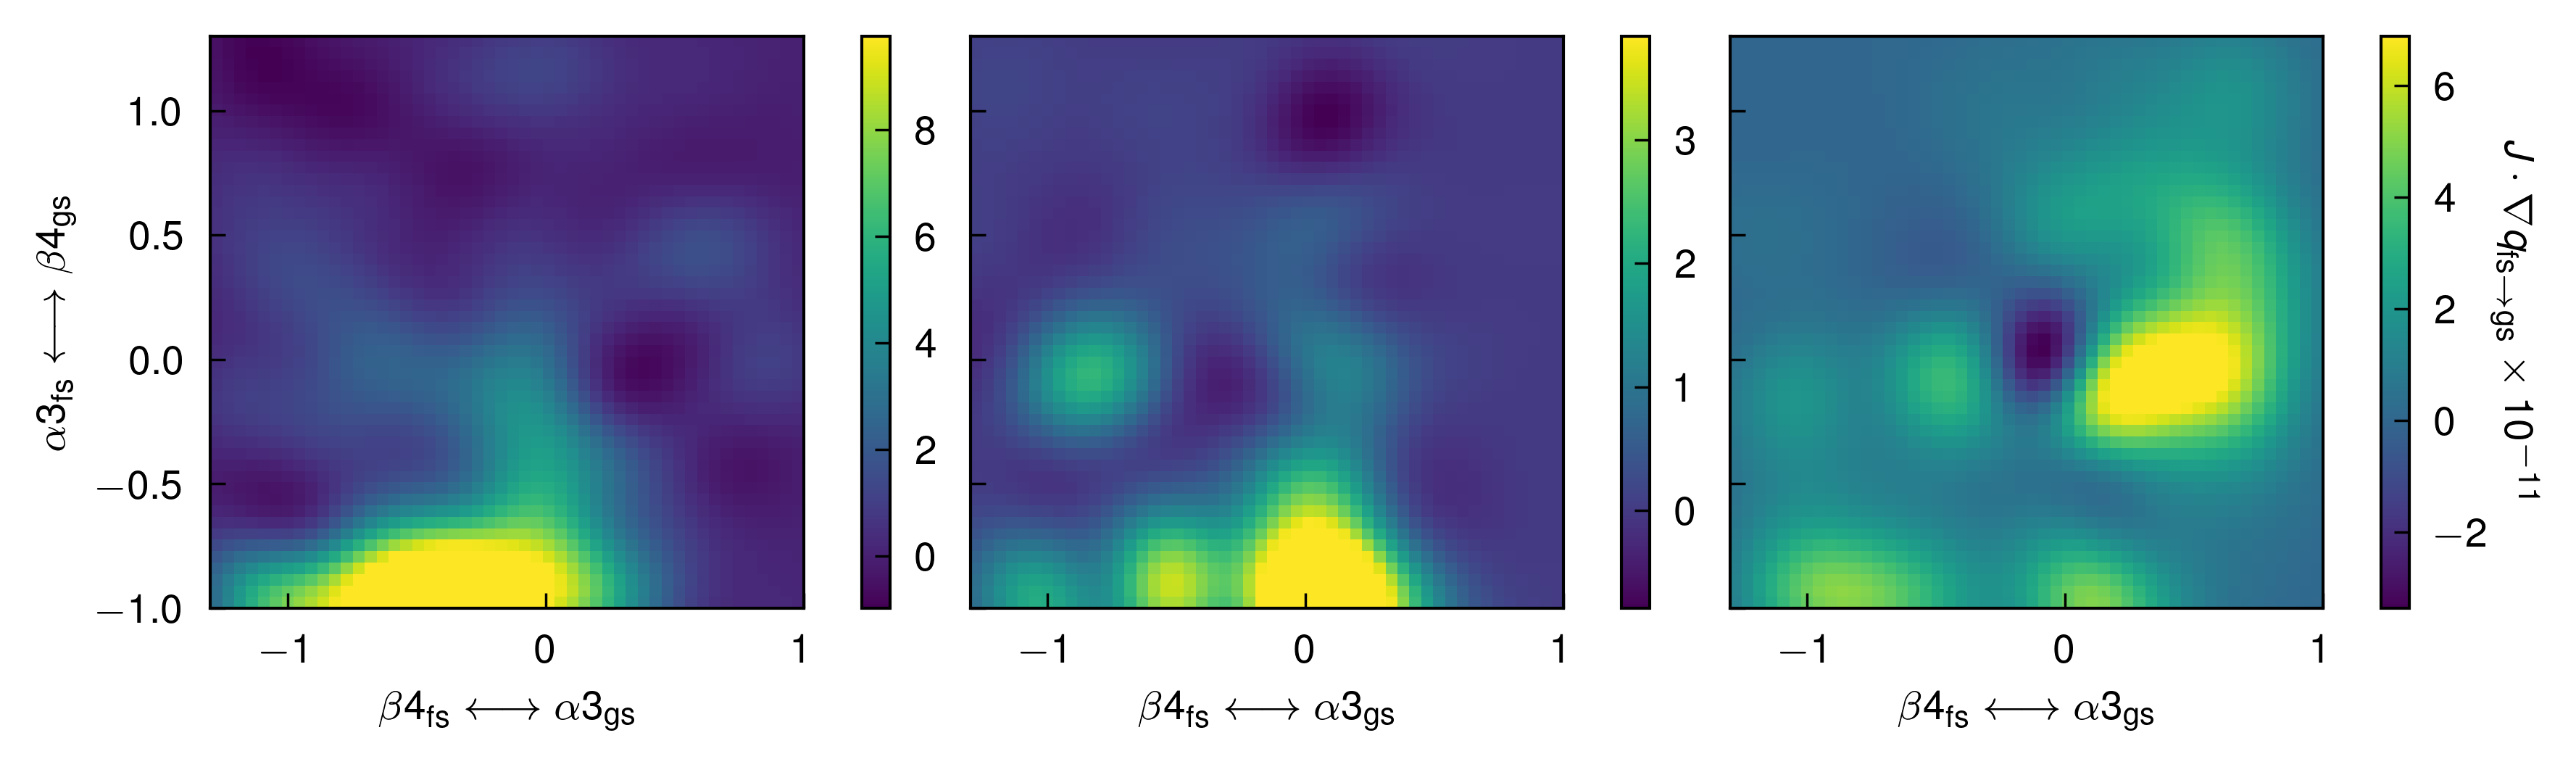

In [32]:
index = 5

fig, axes = plt.subplots(1, 3, figsize=(7, 2), sharex=True, sharey=True, constrained_layout=True, dpi=500)
for (zkde, ax) in zip(hists_all, axes.flat):
    qslice = zkde.swapaxes(2, 0)[index] * 1e11
    pcm = ax.pcolormesh(
        xlim_flux, ylim_flux, qslice, shading="flat", vmax=(np.mean(qslice) + 3 * np.std(qslice)), rasterized=True
    )
    cb = plt.colorbar(pcm, ax=ax)
    ax.set_xlabel(labels[cv1])
    ax.set_ylabel(labels[cv2])
    ax.label_outer()
cb.set_label(r"$J\cdot \nabla q_{\mathrm{fs}\rightarrow\mathrm{gs}}\times 10^{-11}$", rotation=-90, labelpad=10)
# fig.savefig(
#     f"/project/dinner/scguo/kaiB/dga/figures/currents_slice{index}.png", bbox_inches="tight"
# )

In [15]:
cv1, cv2 = "blue", "orange"
hists_all = []
for t in temps:
    base_dir = f"/project/dinner/scguo/kaiB/dga/{t}"
    zkde = np.load(f"{base_dir}/dga_data/current_kde_{cv1}_{cv2}.npy")
    hists_all.append(zkde)

In [18]:
nx, ny, nz = 50, 50, 10
xmin, xmax = lims[cv1]
ymin, ymax = lims[cv2]
zmin, zmax = lims["qp"]
xlim_flux = np.linspace(xmin, xmax, nx + 1)
ylim_flux = np.linspace(ymin, ymax, ny + 1)
zlim_flux = np.linspace(zmin, zmax, nz + 1)
centerx_flux = (xlim_flux[1:] + xlim_flux[:-1]) / 2
centery_flux = (ylim_flux[1:] + ylim_flux[:-1]) / 2
centerz_flux = (zlim_flux[1:] + zlim_flux[:-1]) / 2

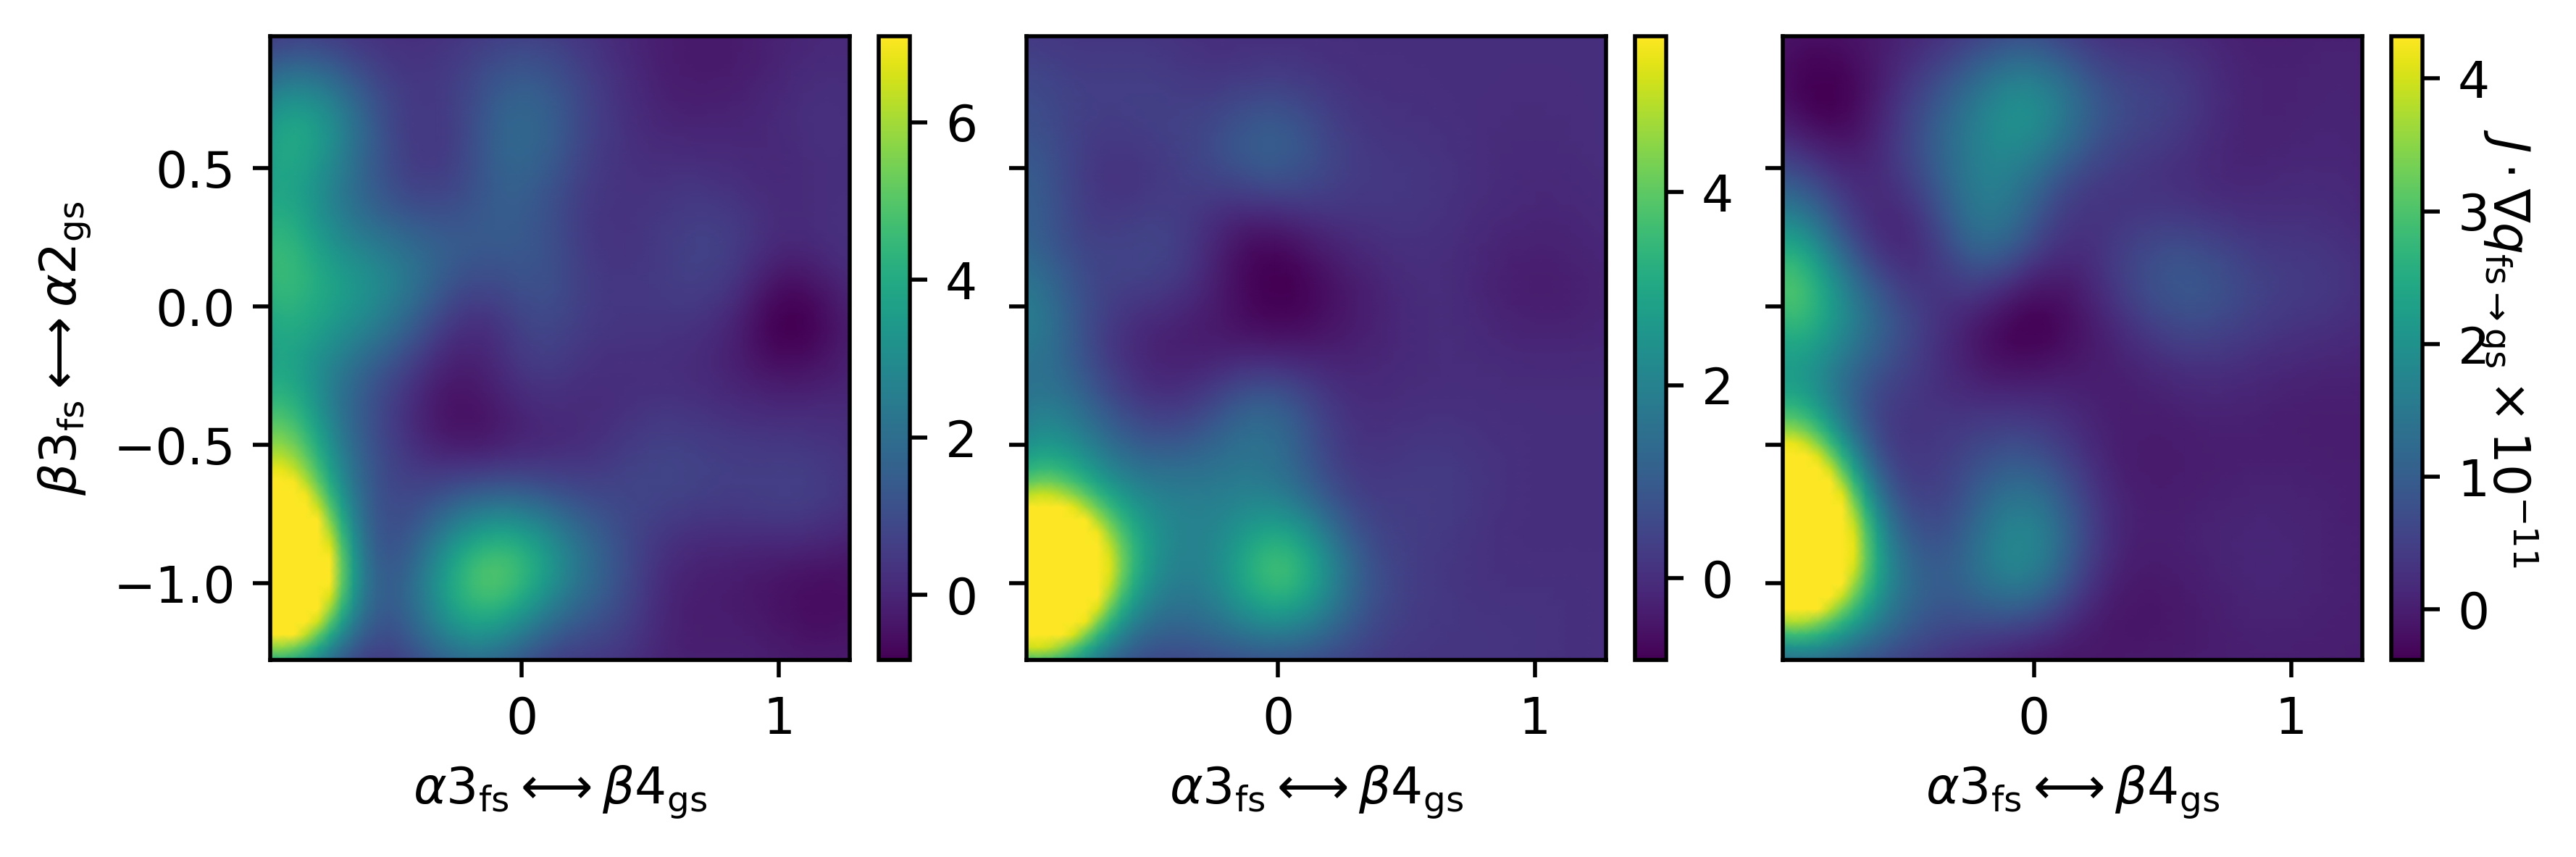

In [20]:
index = 4

fig, axes = plt.subplots(1, 3, figsize=(7, 2.25), sharex=True, sharey=True, constrained_layout=True, dpi=500)
for (zkde, ax) in zip(hists_all, axes.flat):
    qslice = zkde.swapaxes(2, 0)[index] * 1e11
    pcm = ax.pcolormesh(
        centerx_flux, centery_flux, qslice, shading="gouraud", vmax=(np.mean(qslice) + 3 * np.std(qslice)), rasterized=True
    )
    cb = plt.colorbar(pcm, ax=ax)
    ax.set_xlabel(labels[cv1])
    ax.set_ylabel(labels[cv2])
    ax.label_outer()
cb.set_label(r"$J\cdot \nabla q_{\mathrm{fs}\rightarrow\mathrm{gs}}\times 10^{-11}$", rotation=-90, labelpad=10)
fig.savefig(
    f"/project/dinner/scguo/kaiB/dga/figures/currents_{cv1}_{cv2}_slice{index}.png", bbox_inches="tight"
)

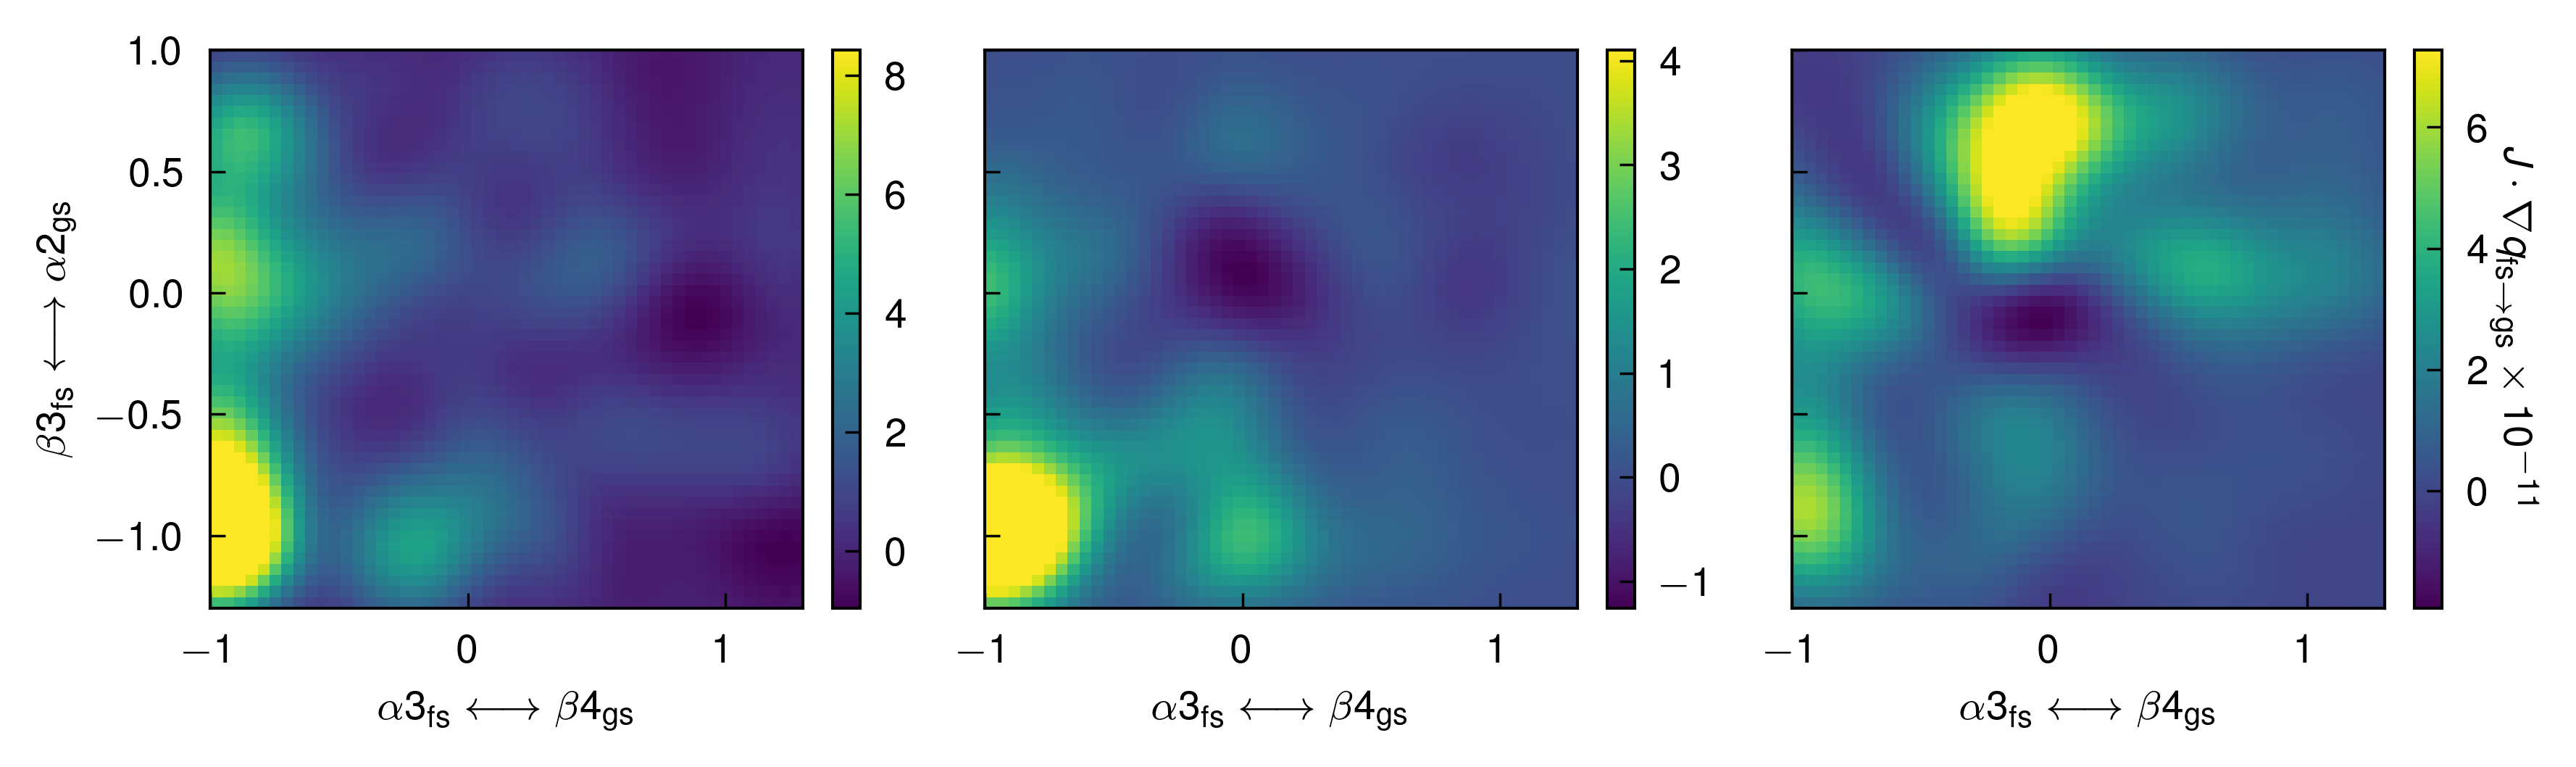

In [37]:
index = 5

fig, axes = plt.subplots(1, 3, figsize=(7, 2), sharex=True, sharey=True, constrained_layout=True, dpi=500)
for (zkde, ax) in zip(hists_all, axes.flat):
    qslice = zkde.swapaxes(2, 0)[index] * 1e11
    pcm = ax.pcolormesh(
        xlim_flux, ylim_flux, qslice, shading="flat", vmax=(np.mean(qslice) + 3 * np.std(qslice)), rasterized=True
    )
    cb = plt.colorbar(pcm, ax=ax)
    ax.set_xlabel(labels[cv1])
    ax.set_ylabel(labels[cv2])
    ax.label_outer()
cb.set_label(r"$J\cdot \nabla q_{\mathrm{fs}\rightarrow\mathrm{gs}}\times 10^{-11}$", rotation=-90, labelpad=10)
# fig.savefig(
#     f"/project/dinner/scguo/kaiB/dga/figures/currents_slice{index}.png", bbox_inches="tight"
# )

In [21]:
cv1, cv2 = "green", "orange"
temps = [87, 89, 91]
hists_all = []
for t in temps:
    base_dir = f"/project/dinner/scguo/kaiB/dga/{t}"
    zkde = np.load(f"{base_dir}/dga_data/current_kde_{cv1}_{cv2}.npy")
    hists_all.append(zkde)

In [22]:
nx, ny, nz = 50, 50, 10
xmin, xmax = lims[cv1]
ymin, ymax = lims[cv2]
zmin, zmax = lims["qp"]
xlim_flux = np.linspace(xmin, xmax, nx + 1)
ylim_flux = np.linspace(ymin, ymax, ny + 1)
zlim_flux = np.linspace(zmin, zmax, nz + 1)
centerx_flux = (xlim_flux[1:] + xlim_flux[:-1]) / 2
centery_flux = (ylim_flux[1:] + ylim_flux[:-1]) / 2
centerz_flux = (zlim_flux[1:] + zlim_flux[:-1]) / 2

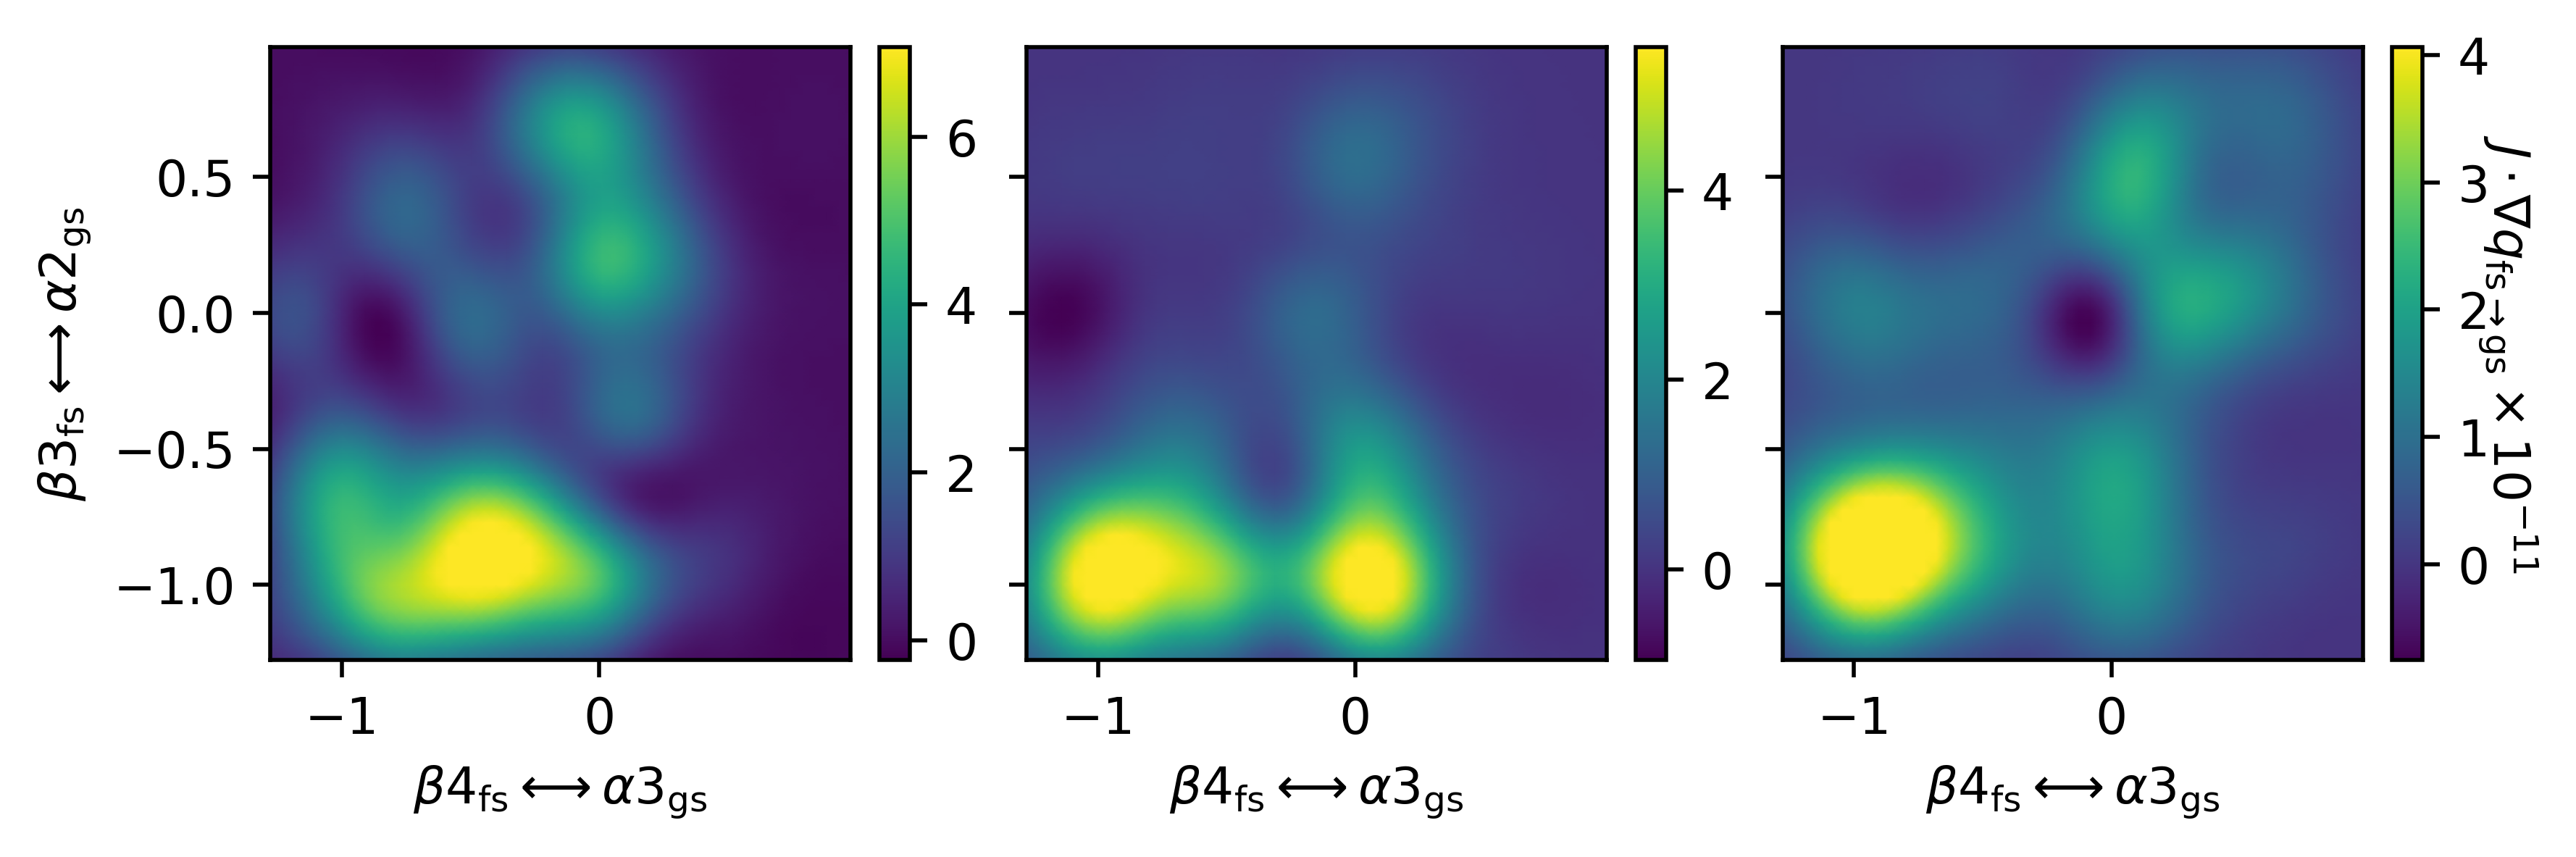

In [23]:
index = 4

fig, axes = plt.subplots(1, 3, figsize=(7, 2.25), sharex=True, sharey=True, constrained_layout=True, dpi=500)
for (zkde, ax) in zip(hists_all, axes.flat):
    qslice = zkde.swapaxes(2, 0)[index] * 1e11
    pcm = ax.pcolormesh(
        centerx_flux, centery_flux, qslice, shading="gouraud", vmax=(np.mean(qslice) + 3 * np.std(qslice)), rasterized=True
    )
    cb = plt.colorbar(pcm, ax=ax)
    ax.set_xlabel(labels[cv1])
    ax.set_ylabel(labels[cv2])
    ax.label_outer()
cb.set_label(r"$J\cdot \nabla q_{\mathrm{fs}\rightarrow\mathrm{gs}}\times 10^{-11}$", rotation=-90, labelpad=10)
fig.savefig(
    f"/project/dinner/scguo/kaiB/dga/figures/currents_{cv1}_{cv2}_slice{index}.png", bbox_inches="tight"
)

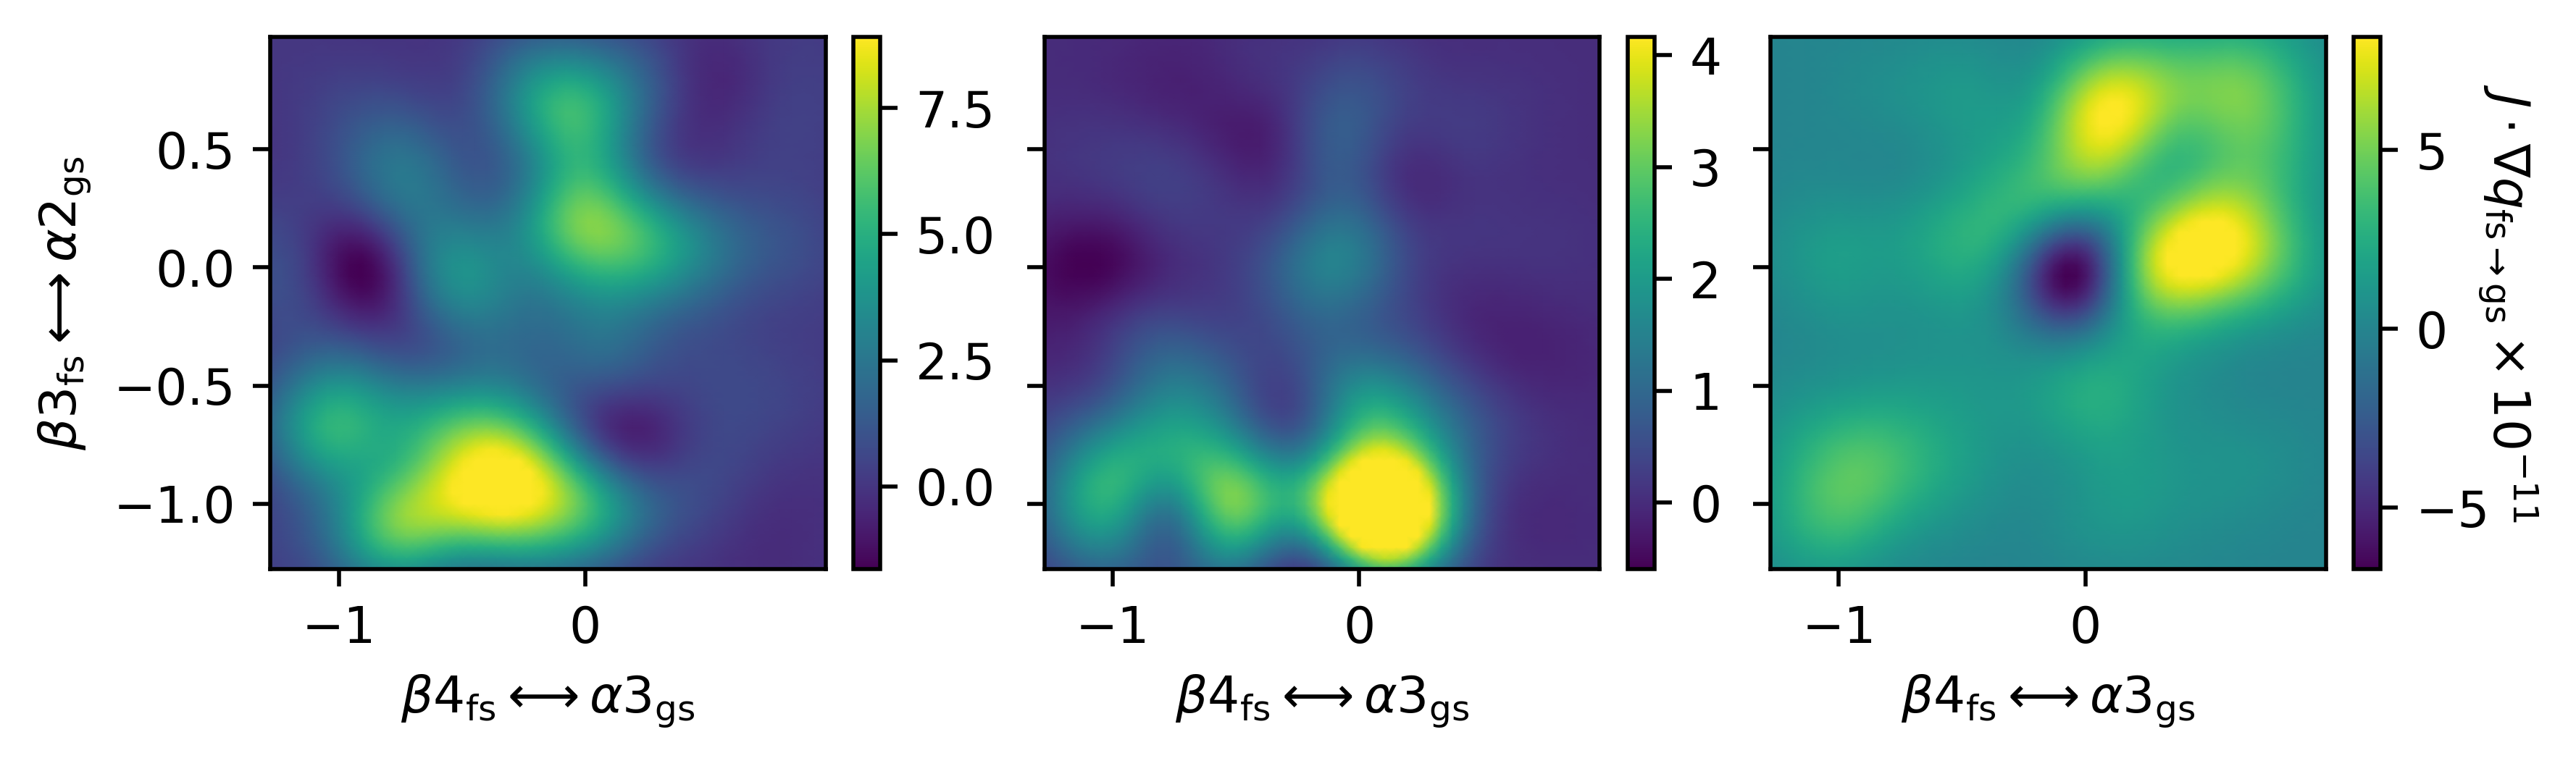

In [24]:
index = 5

fig, axes = plt.subplots(1, 3, figsize=(7, 2), sharex=True, sharey=True, constrained_layout=True, dpi=500)
for (zkde, ax) in zip(hists_all, axes.flat):
    qslice = zkde.swapaxes(2, 0)[index] * 1e11
    pcm = ax.pcolormesh(
        centerx_flux, centery_flux, qslice, shading="gouraud", vmax=(np.mean(qslice) + 3 * np.std(qslice)), rasterized=True
    )
    cb = plt.colorbar(pcm, ax=ax)
    ax.set_xlabel(labels[cv1])
    ax.set_ylabel(labels[cv2])
    ax.label_outer()
cb.set_label(r"$J\cdot \nabla q_{\mathrm{fs}\rightarrow\mathrm{gs}}\times 10^{-11}$", rotation=-90, labelpad=10)
# fig.savefig(
#     f"/project/dinner/scguo/kaiB/dga/figures/currents_slice{index}.png", bbox_inches="tight"
# )